In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# 1. Create a random tree with variable branch lengths
import random
import phylustrator as ph
import ete3

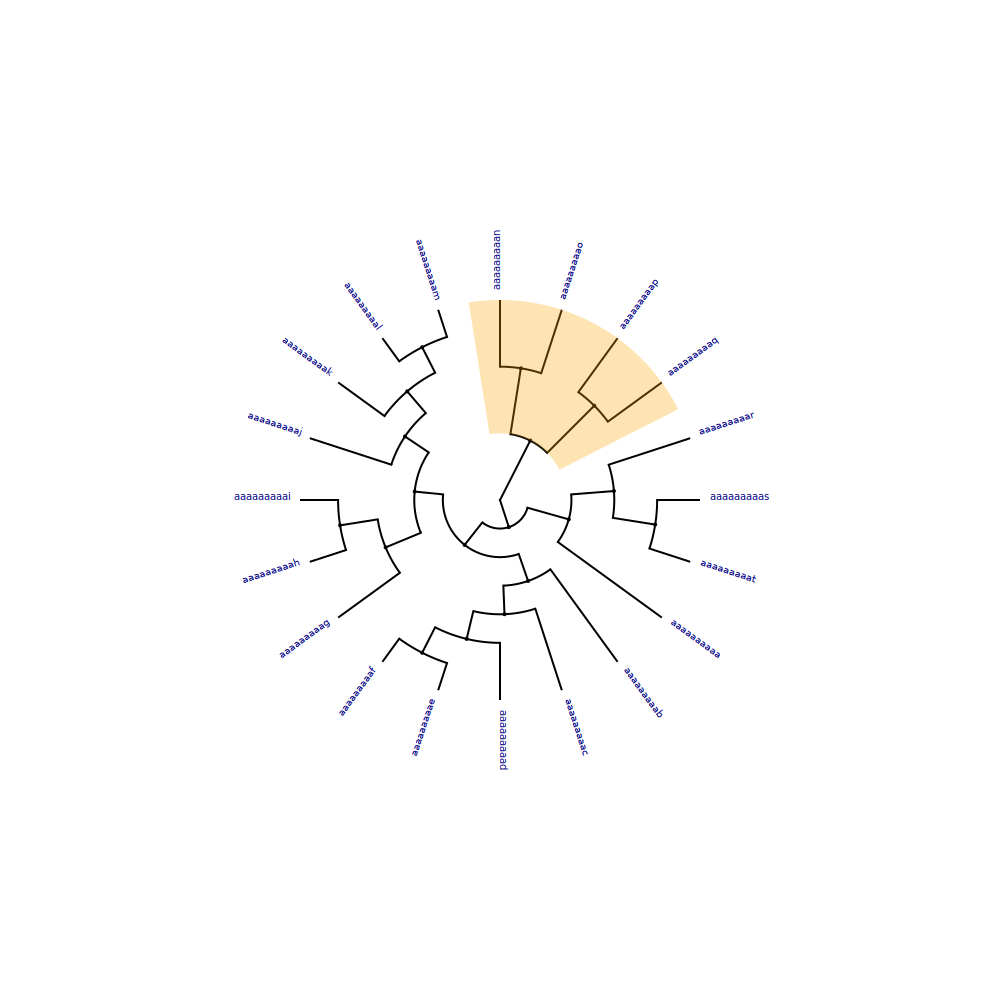

In [7]:
import phylustrator as ph
import ete3 
import random

# 1. Create Tree
t = ete3.Tree()
t.populate(20)

for n in t.traverse(): n.dist = random.uniform(0.1, 1.5)
t.convert_to_ultrametric()

style = ph.TreeStyle(radius=300, leaf_color="none") # Hide dots to see names better
style.radius = 200
drawer = ph.TreeDrawer(t, style=style)
drawer.draw()

# 2. Add Decorations
# Add names
drawer.add_leaf_names(text_size=10, color="navy")

# Highlight a random clade (let's pick a child of the root)
clade_to_highlight = t.get_children()[0]
drawer.highlight_clade(clade_to_highlight, color="orange", opacity=0.3)

display(drawer.d)

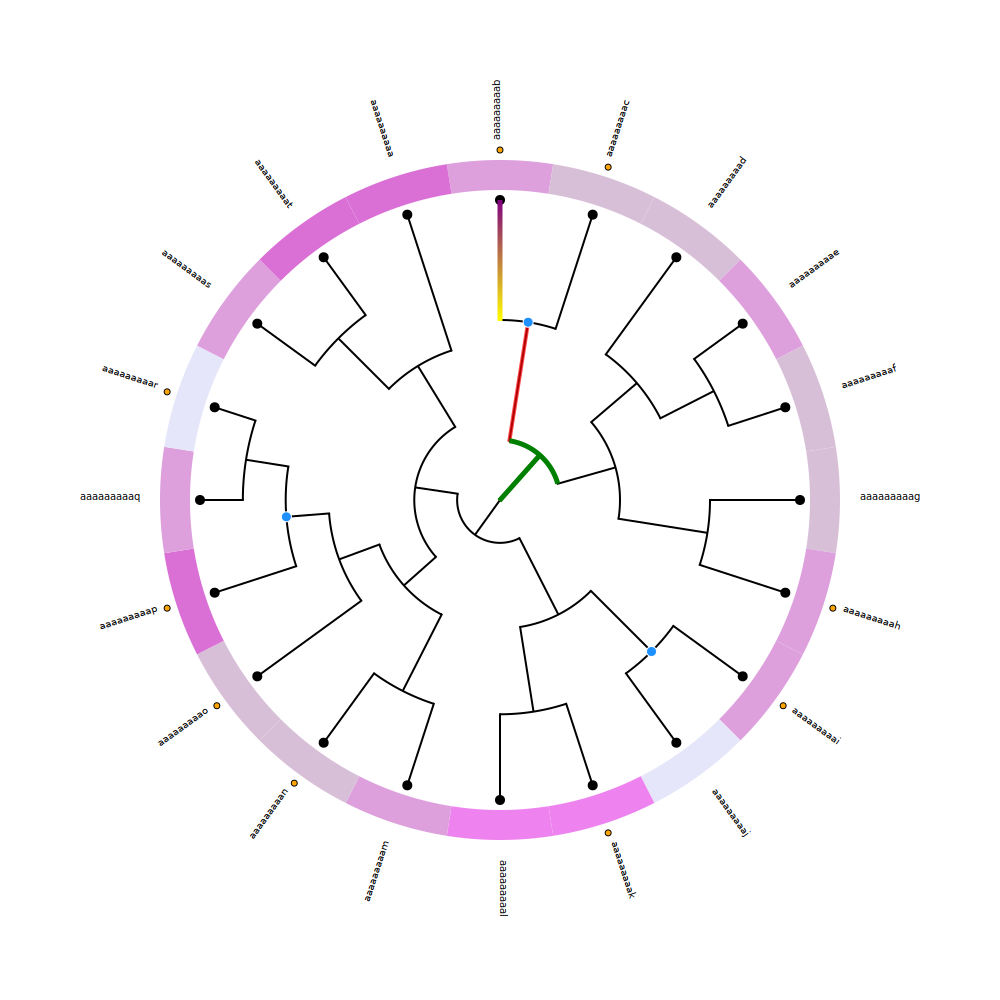

In [10]:
import phylustrator as ph
import ete3 
import random

# 1. Setup Tree
t = ete3.Tree()
t.populate(20)
# Make it ragged to prove coordinates work
for n in t.traverse(): n.dist = random.uniform(0.5, 2.0)
t.convert_to_ultrametric()

style = ph.TreeStyle(radius=300, node_size=0) # Hide default nodes
drawer = ph.TreeDrawer(t, style=style)
drawer.draw()

# --- DEMO DECORATIONS ---

# 1. Highlight specific branches (e.g., path to a leaf)
target_leaf = t.get_leaves()[0]
node = target_leaf
while node.up:
    drawer.highlight_branch(node, color="red", size=4, opacity=0.7)
    node = node.up

# 2. Add shapes to internal nodes (e.g., Bootstrap > 0.8)
# We'll just pick random nodes for the demo
random_nodes = random.sample(list(t.traverse()), 5)
node_map = {n: "dodgerblue" for n in random_nodes if not n.is_leaf()}
drawer.add_node_shapes(node_map, size=5, stroke="white")

# 3. Add a "Metadata" Ring (Heatmap)
# Map leaf names to random colors
colors = ["#E6E6FA", "#D8BFD8", "#DDA0DD", "#EE82EE", "#DA70D6"] # Purples
ring_map = {l.name: random.choice(colors) for l in t.get_leaves()}
drawer.add_ring(ring_map, width=30, padding=10)

# 4. Add Leaf Shapes (e.g. another trait) outside the ring
shape_map = {l.name: "orange" for l in t.get_leaves() if random.random() > 0.5}
# Note: Padding must account for the ring (10 + 30) plus extra space
drawer.add_leaf_shapes(shape_map, padding=50, size=3)

# 5. Add Names outside everything
drawer.add_leaf_names(padding=60, text_size=10)

# Test Gradient
# (Assuming t and drawer are already set up)
target = t.get_leaves()[0]
drawer.gradient_branch(target, colors=("yellow", "purple"), size=5)

# Test Highlight with Arc
internal_node = t.get_common_ancestor(t.get_leaves()[1], t.get_leaves()[2])
drawer.highlight_branch(internal_node, color="green", size=5, include_arc=True)




display(drawer.d)